In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #import the required libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import cv2
import os

C:\Users\nanug\.conda\envs\tf-gpu\lib\site-packages\requests\__init__.py:78: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({0}) or chardet ({1}) doesn't match a supported "


In [2]:
image=image.load_img("train/angry/Training_3908.jpg") #load the image

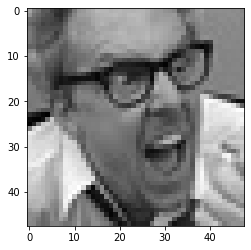

In [3]:
plt.imshow(image)

In [4]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255) #train and test the data

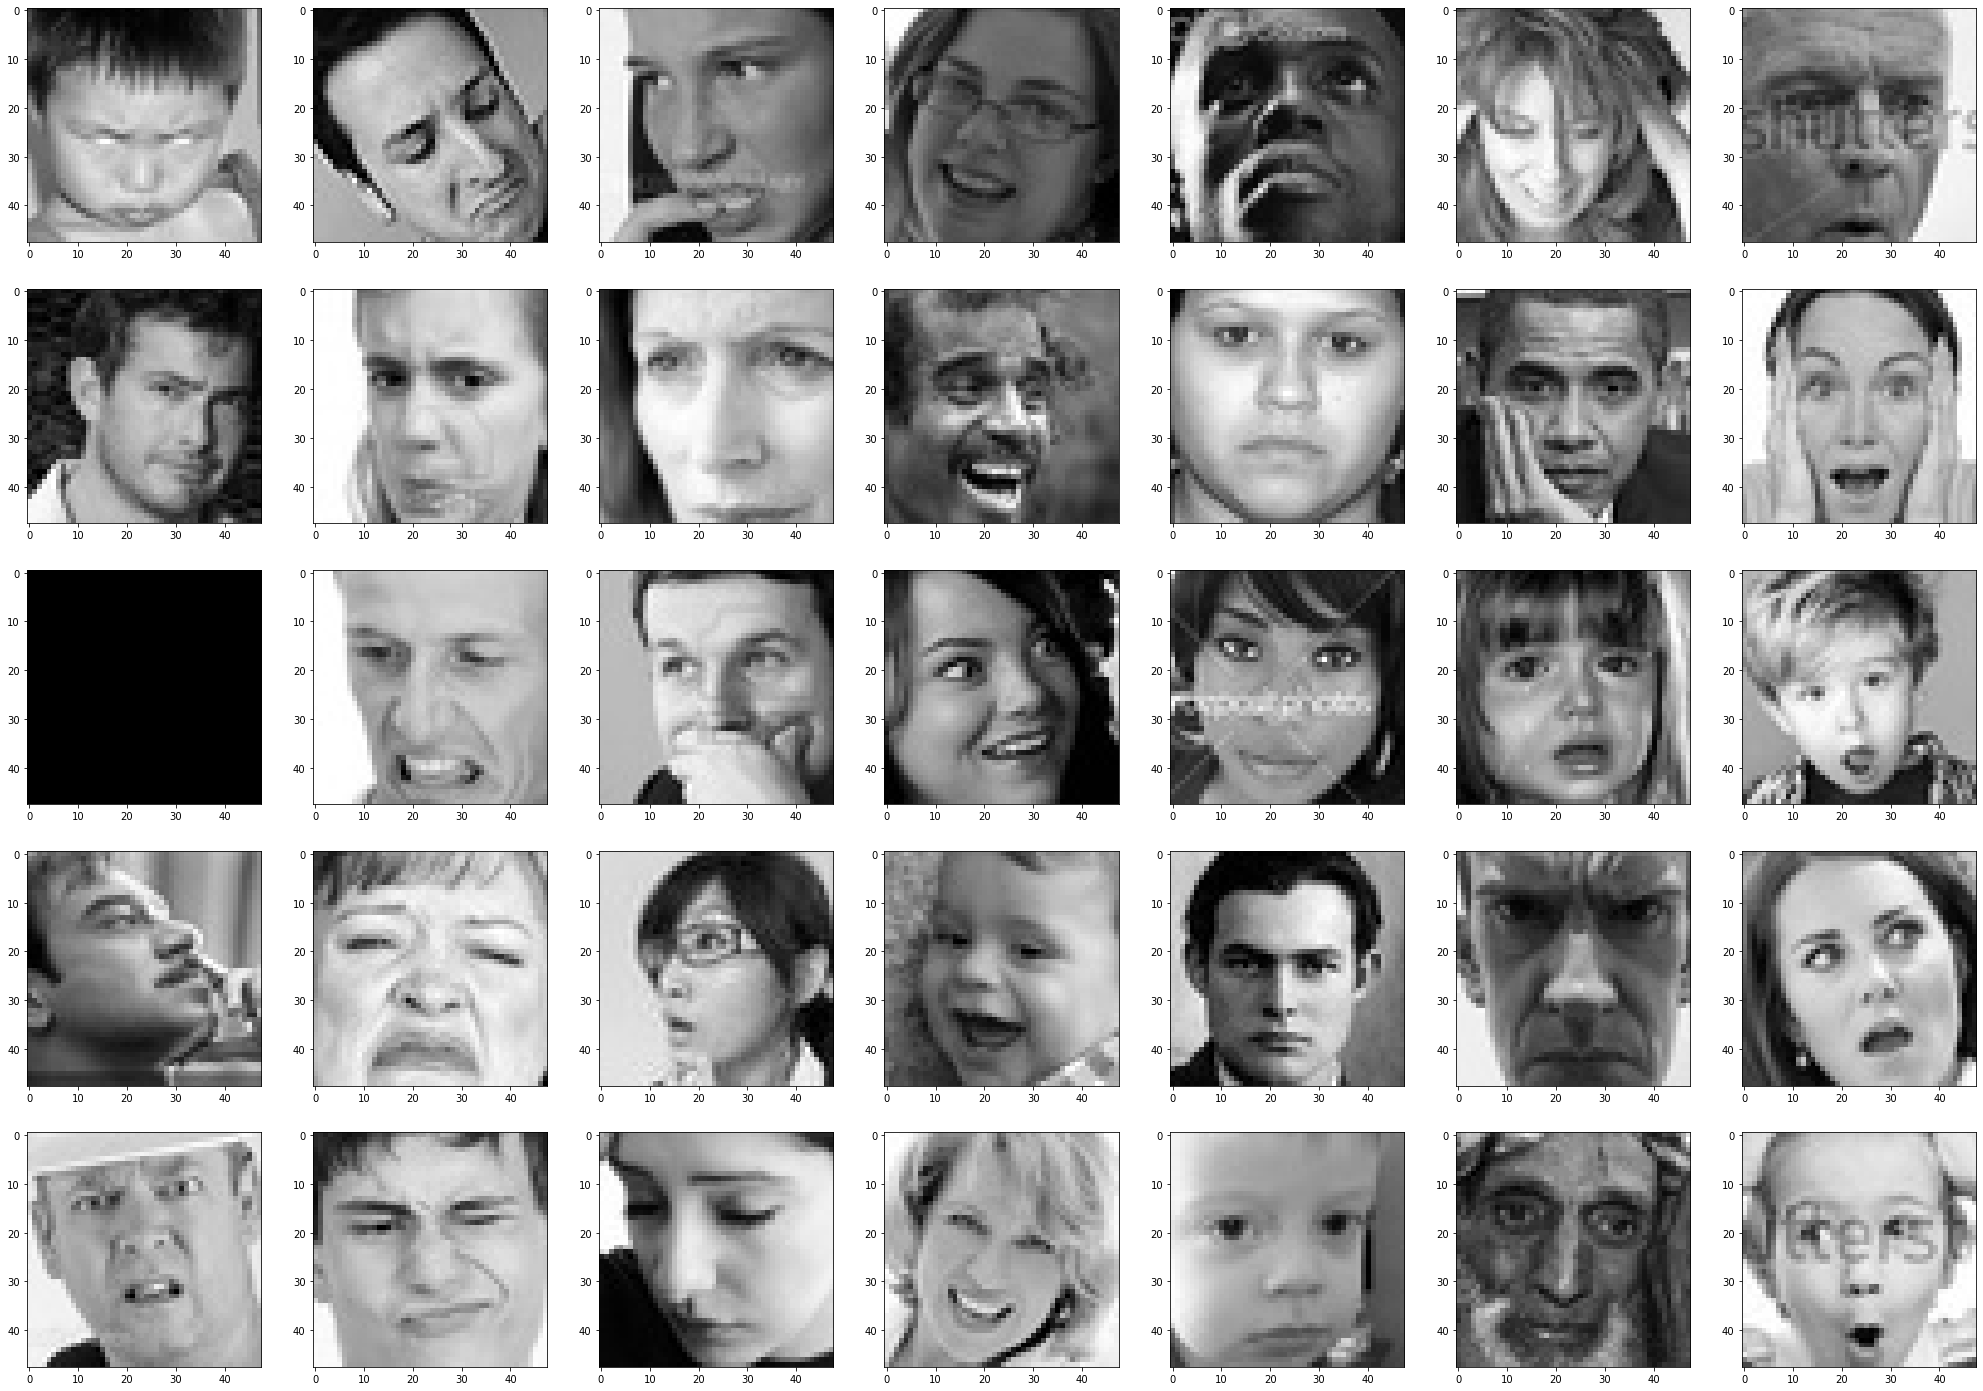

In [5]:
from skimage.io import imread #take the directory of training and testing datasets
import os


train_dir="train/"
test_dir="test/"
total_labels=len(os.listdir(train_dir))

fig, ax= plt.subplots(nrows=5, ncols=total_labels, figsize=(35,25))
for x in range(5):
    for y,z in zip(range(total_labels), os.listdir(train_dir)):
        ax[x][y].imshow(imread(train_dir + z + '/' + os.listdir(train_dir + z)[x]),cmap='gray')
        
plt.show()

<AxesSubplot:ylabel='total'>

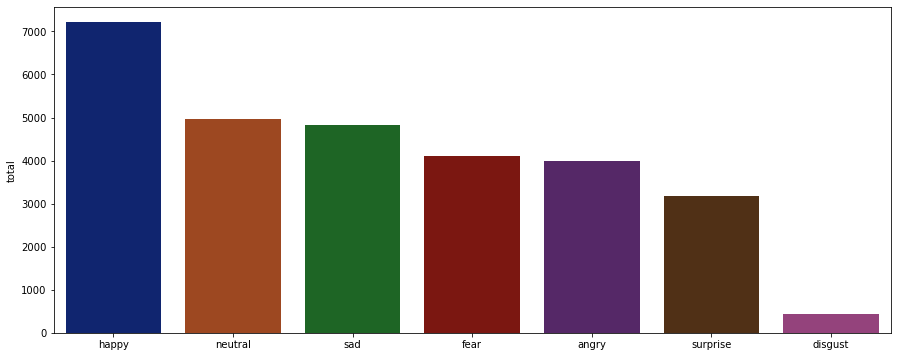

In [6]:
df={}
for i in os.listdir(train_dir):
    directory= train_dir + i
    df[i]=len(os.listdir(directory))
    
df=pd.DataFrame(df, index=["total"]).transpose().sort_values("total", ascending= False)


plt.figure(figsize=(15,6))
import seaborn as sns
sns.barplot(x=df.index, y="total", palette="dark", data=df) #to see how many image we have for each category

In [7]:
import numpy as np
happy= os.listdir(train_dir + 'happy/')
dim1,dim2 = [], []
for img_filename in happy:
    img=imread(train_dir + 'happy/' + img_filename)
    d1,d2= img.shape
    dim1.append(d1)
    dim2.append(d2)
    
img_shape = (int(np.mean(dim1)), int(np.mean(dim2)),1) #to see how many happy images we have after shaping that append in dimensions list

In [8]:
train_gen = ImageDataGenerator(rescale=1/255,
                              rotation_range=40, width_shift_range=0.2,
                              height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_gen= ImageDataGenerator(rescale=1/255)
img_shape = (int(np.mean(dim1)), int(np.mean(dim2)),1)
train_generator = train_gen.flow_from_directory(directory=train_dir ,
                                               target_size=(img_shape[0],img_shape[1]), color_mode='grayscale', batch_size=64,
                                               class_mode='categorical', shuffle= True)
test_generator = test_gen.flow_from_directory(directory=test_dir ,
                                               target_size=(img_shape[0],img_shape[1]), color_mode='grayscale', batch_size=64,
                                               class_mode='categorical', shuffle= True) #prepare train and testing datasets

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten, BatchNormalization, Conv2D,MaxPooling2D, Activation
#preparation for models
model=Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=img_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=len(os.listdir(train_dir)), activation='softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      5

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001,decay= 1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
#use of optimizers to reduce the overall loss by improving accuracy

In [13]:
#fitting the model and run it.
steps_per_epoch=448
validation_steps=test_generator.n
num_epochs=50
history= model.fit(train_generator, epochs=num_epochs,
                  verbose=1, validation_data=test_generator, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50
448/448 [==============================] - 54s 121ms/step - loss: 1.7236 - accuracy: 0.2983
Epoch 2/50
448/448 [==============================] - 53s 118ms/step - loss: 1.6893 - accuracy: 0.3178
Epoch 3/50
448/448 [==============================] - 54s 121ms/step - loss: 1.6630 - accuracy: 0.3337
Epoch 4/50
448/448 [==============================] - 54s 120ms/step - loss: 1.6287 - accuracy: 0.3534
Epoch 5/50
448/448 [==============================] - 53s 117ms/step - loss: 1.6032 - accuracy: 0.3667
Epoch 6/50
448/448 [==============================] - 55s 122ms/step - loss: 1.5561 - accuracy: 0.3914
Epoch 7/50
448/448 [==============================] - 52s 115ms/step - loss: 1.5367 - accuracy: 0.4016
Epoch 8/50
448/448 [==============================] - 44s 99ms/step - loss: 1.5010 - accuracy: 0.4150
Epoch 9/50
448/448 [==============================] - 55s 123ms/step - loss: 1.4759 - accuracy: 0.4253
Epoch 10/50
448/448 [==============================] - 54s 120ms/step - lo

In [14]:
model.save("music_model") #save the model

INFO:tensorflow:Assets written to: music_model\assets


In [15]:
test_loss, test_accuracy= model.evaluate(test_generator)
print("Validation accuracy :", str(test_accuracy*100)+ ' %') #what is the validation accuracy & loss
print("Validation loss : ", test_loss)

113/113 [==============================] - 11s 92ms/step - loss: 1.0447 - accuracy: 0.6091
Validation accuracy : 60.908329486846924 %
Validation loss :  1.0447335243225098


In [ ]:
videoCaptureObject = cv2.VideoCapture(0)
result = True
while(result):
    ret,frame = videoCaptureObject.read()
    cv2.imwrite("NewPicture.jpg",frame)
    result = False
videoCaptureObject.release()
cv2.destroyAllWindows()

In [ ]:
from IPython.display import Image

In [ ]:
Image(filename='NewPicture.jpg')

In [12]:
import cv2
import os
from tensorflow.python.keras.models import load_model
model=load_model("music_model", custom_objects={"Functional ": tf.keras.models.Model })

In [13]:
Emotion=['angry', 'disgust', 'fear', 'surprise', 'happy', 'sad', 'neutral']
img=image
resize_img=cv2.resize(img,(48,48),interpolation=cv2.INTER_BITS2)
gray = cv2.cvtColor(resize_img, cv2.COLOR_BGR2GRAY) / 255.0

gray=gray.reshape(1,48,48,1)
pred=model.predict(gray)[0]
labels=Emotion[pred.argmax()]
for (i,j) in zip(range(len(Emotion)), Emotion):
    predd=pred[i]
    print("{:^10s}".format(j)+ "prediction rate : {0:.2f}%".format(predd))

print("\n\n The System identified the emotion to be : ",labels)

  angry   prediction rate : 0.05%
 disgust  prediction rate : 0.00%
   fear   prediction rate : 0.06%
 surprise prediction rate : 0.40%
  happy   prediction rate : 0.18%
   sad    prediction rate : 0.28%
 neutral  prediction rate : 0.02%


 The System identified the emotion to be :  surprise


In [21]:
from IPython.display import Audio

In [22]:
import random
if(labels=='angry'): #so if we get particular reaction as label, it will go to the reacted music path and randomly 
                     #play any music
    path='music\\angry\\'
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing :",d)
    audio=Audio(filename='music\\angry\\' + d,autoplay=True)
    display(audio)
    
elif(labels=='disgust'):
    path='music\\disgust\\'
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing :",d)
    audio=Audio(filename='music\\disgust\\' + d,autoplay=True)
    display(audio)
    
elif(labels=='fear'):
    path='music\\fear\\'
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing :",d)
    audio=Audio(filename='music\\fear\\' + d,autoplay=True)
    display(audio)
    
elif(labels=='surprise'):
    path='music\\surprise\\'
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing :",d)
    audio=Audio(filename='music\\surprise\\' + d,autoplay=True)
    display(audio)
    
elif(labels=='happy'):
    path='music\\happy\\'
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing :",d)
    audio=Audio(filename='music\\happy\\' + d,autoplay=True)
    display(audio)
    
elif(labels=='sad'):
    path='music\\sad\\'
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing :",d)
    audio=Audio(filename='music\\sad\\' + d,autoplay=True)
    display(audio)
    
elif(labels=='neutral'):
    path='music\\neutral\\'
    files=os.listdir(path)
    d=random.choice(files)
    print("Now Playing :",d)
    audio=Audio(filename='music\\neutral\\' + d,autoplay=True)
    display(audio)

Now Playing : Annaatthe's-Rampage-MassTamilan.fm.mp3


# please prepare your own playlist